<a href="https://colab.research.google.com/github/mikekerklin/IntelliJ-Projects/blob/main/Copy_of_Homework_Week_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt
import sklearn.metrics as metrics
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print (df.head)
print (df.describe())

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8  

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [3]:
print (df.head)

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8  

In [72]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
X = df.drop('target',axis='columns')
y = df.target
kf = KFold(n_splits=10)
knn = KNeighborsClassifier(n_neighbors=15)
scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
print(scores)

[1.         1.         1.         0.93333333 0.86666667 0.86666667
 1.         0.86666667 0.8        0.93333333]


In [69]:
model = KNeighborsClassifier(n_neighbors=15)
model.fit(X,y)
pred = model.predict(X)
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [70]:
metrics.accuracy_score(y,pred)

0.9866666666666667

In [71]:
metrics.confusion_matrix(y,pred)

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]])

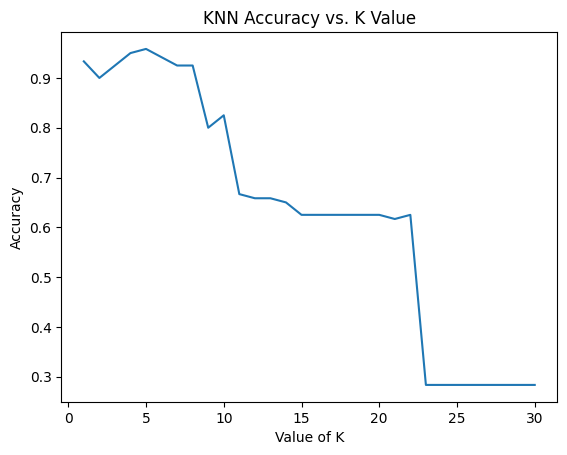

In [98]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=4)
k_values = range(1,31)
accuracy = []
for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    accuracy_score = metrics.accuracy_score(y_test,pred)
    accuracy.append(accuracy_score)
plt.plot(k_values[:len(accuracy)],accuracy)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. K Value')
plt.show()

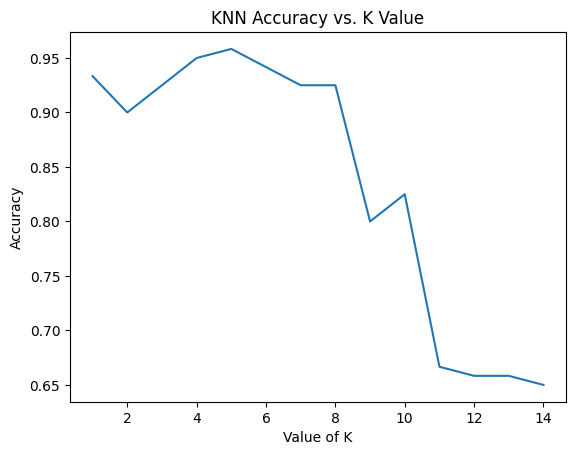

In [99]:
accuracy = []
for k in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    accuracy_score = metrics.accuracy_score(y_test,pred)
    accuracy.append(accuracy_score)
plt.plot(k_values[:len(accuracy)],accuracy)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. K Value')
plt.show()

Maximum Accuracy: 0.9583333333333334
Best K Value: 5


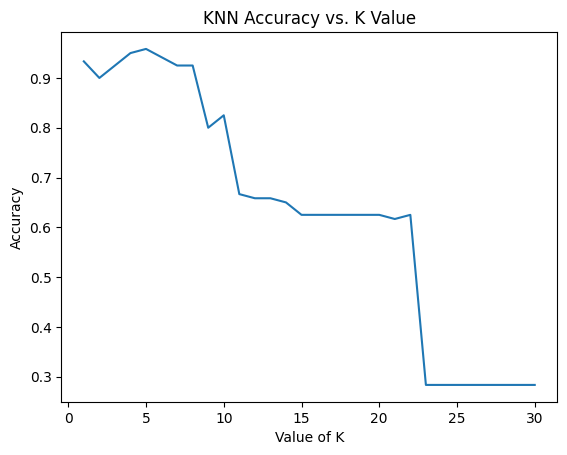

In [114]:
accuracy = []
for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    accuracy_score = metrics.accuracy_score(y_test,pred)
    accuracy.append(accuracy_score)
    max_accuracy = max(accuracy)
    best_k = accuracy.index(max_accuracy) + 1
print("Maximum Accuracy:", max_accuracy)
print("Best K Value:", best_k)
plt.plot(k_values[:len(accuracy)],accuracy)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. K Value')
plt.show()

Maximum Accuracy: 0.9583333333333334
Best K Value: 5


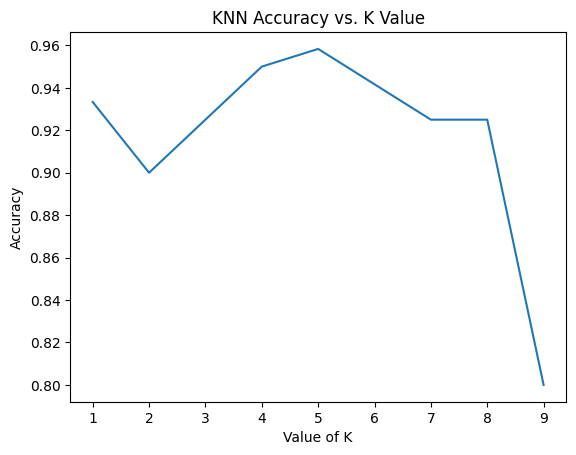

In [120]:
accuracy = []
for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    accuracy_score = metrics.accuracy_score(y_test,pred)
    accuracy.append(accuracy_score)
    max_accuracy = max(accuracy)
    best_k = accuracy.index(max_accuracy) + 1
print("Maximum Accuracy:", max_accuracy)
print("Best K Value:", best_k)
plt.plot(k_values[:len(accuracy)],accuracy)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. K Value')
plt.show()

In [154]:
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier

ParameterGrid = {'n_neighbors': range(1,31)}
gridsearch = GridSearchCV(KNeighborsClassifier(),ParameterGrid,cv=11, scoring='accuracy')
gridsearch.fit(X_test, y_test)
print('Best parameters: ', gridsearch.best_params_)
print('Best score: ', gridsearch.best_score_)


Best parameters:  {'n_neighbors': 13}
Best score:  0.9917355371900828
